########################################################

Code for Masters dissertation

Produced using Julia 1.7.3 within Jupyter Notebook 6.4.4

########################################################

########################################################

RVIA for the simple model from Section 4, and the three examples

########################################################

In [1]:
using Plots
using PyPlot


function rviaMDD(N::Int64, alpha_d::Float64, alpha_r::Float64, beta::Float64, tau, c0::Float64, c1::Float64, r::Float64, epsilon::Float64, nMax = 0)
    #calculate stepsize and initialise h,w,and policy vectors
    del = 1/max(beta*alpha_d + N*alpha_r, tau(N))
    h = Float64[0 for i in 0:N]
    w = Float64[0 for i in 0:N]
    g = Float64[0 for i in 0:N]
    policy = Int64[0 for i in 0:N]
    n = 0
    #repeat until epsilion-convergence or n = nMax
    while true
        n = n + 1
        #calculate new w values and keep track of optimal policy. Treat 0, 0<i<N, and N cases seperately
        w[0+1] = beta*c0*del + (1 - (beta*alpha_d + (N)*alpha_r)*del)*h[0+1] + (beta*alpha_d + N*alpha_r)*del*h[1+1]
        g = Float64[0 for i in 0:N]
        for i in 1:(N-1)
            policy[i+1] = 0
            w[i+1] = beta*c0*del + (1 - (beta*alpha_d + (N-i)*alpha_r)*del)*h[i+1] + (beta*alpha_d + (N-i)*alpha_r)*del*h[i+1+1]
            for a in 1:i
                temp = beta*c0*del + (1 - (beta*alpha_d + (N-i)*alpha_r)*del)*h[i+1] + (beta*alpha_d + (N-i)*alpha_r)*del*h[i+1+1] + a*del*r - tau(a)*del*(h[i+1] - h[i-1+1])
                if temp < w[i+1]
                    w[i+1] = temp
                    g[i+1] = a*del*r - tau(a)*del*(h[i+1] - h[i-1+1])
                    policy[i+1] = a
                end
            end
        end
        
        w[N+1] = beta*c1*del + h[N+1]
        policy[N+1] = 0
        for a in 1:N
            temp = beta*c1*del + h[N+1] + a*del*r - tau(a)*del*(h[N+1] - h[N-1+1])
            if temp < w[N+1]
                w[N+1] = temp
                policy[N+1] = a
                g[N+1] = a*del*r - tau(a)*del*(h[N+1] - h[N-1+1])
            end
        end
        
        #calculate new relative values
        hNew = Float64[w[i+1] - w[0+1] for i in 0:N]
        deltas = Float64[abs(hNew[i+1] - h[i+1]) for i in 0:N]
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
    end
    
    v = beta*c0*del + (1 - (beta*alpha_d + (N)*alpha_r)*del)*h[0+1] + (beta*alpha_d + N*alpha_r)*del*h[1+1]
    
    return v/del, h, policy, g, n
end

rviaMDD (generic function with 2 methods)

In [2]:
#Example One
function tau(i)
    return i
end
N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
#Results of RVIA for 1-step, 10-step, 100-step, and epsilon-converged problems
x1 = rviaMDD(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 1)
println(x1)
x10 = rviaMDD(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 10)
println(x10)
x100 = rviaMDD(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 100)
println(x100)
x784 = rviaMDD(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 784)
println(x784)

(10.0, [0.0, 0.0, 0.0, 0.0, 0.0, 198.0], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1)
(10.00054088674725, [0.0, 0.005151302354777343, 0.17546680600816655, 3.849202802588532, 51.24042313176556, 343.34001144778216], [0, 0, 0, 0, 0, 5], [0.0, 0.0, 0.0, 0.0, 0.0, -192.09958831601375], 10)
(12.96839655704266, [0.0, 28.270443400406283, 84.33030821855012, 171.37582875702762, 276.1739940082019, 572.0361114370778], [0, 0, 0, 0, 4, 5], [0.0, 0.0, 0.0, 0.0, -3.8385322009393406, -195.862117428876], 100)
(20.313202287902417, [0.0, 98.22097417049919, 197.38681614437778, 297.5154654344561, 402.4095707983084, 698.3469206229328], [0, 0, 0, 3, 4, 5], [0.0, 0.0, 0.0, -0.07718957404699722, -3.9152842910818038, -195.9373498246244], 784)


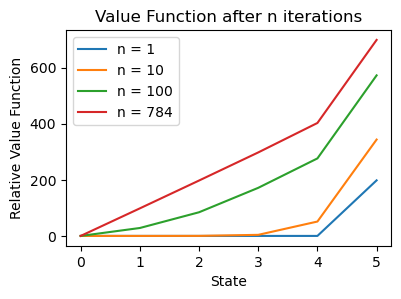

In [99]:
#value function plots
figure(figsize=((3/2)*7/2.5, 7/2.5))

plot(x1[2], label = "n = 1")
xlabel("State")
ylabel("Relative Value Function")
#title("Value Function after 1 iteration")
#savefig("example1n1.pdf", bbox_inches="tight")

#figure(figsize=(4, 4))
plot(x10[2], label = "n = 10")
xlabel("State")
ylabel("Relative Value Function")
#title("Value Function after 10 iterations")
#savefig("example1n10.pdf", bbox_inches="tight")

#figure(figsize=(4, 4))
plot(x100[2], label = "n = 100")
xlabel("State")
ylabel("Relative Value Function")
#title("Value Function after 100 iterations")
#savefig("example1n100.pdf", bbox_inches="tight")

#figure(figsize=(4, 4))
plot(x784[2], label = "n = 784")
xlabel("State")
ylabel("Relative Value Function")
legend()
title("Value Function after n iterations")
savefig("example1.pdf", bbox_inches="tight")

In [87]:
#policies
println(x1[3])
println(x10[3])
println(x100[3])
println(x784[3])

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 5]
[0, 0, 0, 0, 4, 5]
[0, 0, 0, 3, 4, 5]


In [11]:
#Example 2
function tau2(i)
    return log(i+1)
end
N=6
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
#Results of RVIA for 1-step, 10-step, 100-step, and epsilon-converged problems
x2_1 = rviaMDD(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon,1)
println(x2_1)
x2_10 = rviaMDD(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, 10)
println(x2_10)
x2_100 = rviaMDD(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon,100)
println(x2_100)
x2_conv = rviaMDD(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
println(x2_conv)

(10.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 508.7593589460532], [0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1)
(10.002928027673873, [0.0, 0.027622902583707365, 0.5447731098423167, 7.025496560572361, 58.3967398469179, 277.97952982766685, 1078.6381608592594], [0, 0, 0, 0, 0, 1, 6], [0.0, 0.0, 0.0, 0.0, 0.0, -24.97399348834081, -489.55595832363605], 10)
(23.320400995303203, [0.0, 125.66416033304908, 265.92961790861557, 411.7601331340206, 569.5120432134623, 809.8254249739241, 1619.1293127572094], [0, 0, 0, 1, 1, 1, 6], [0.0, 0.0, 0.0, -0.5560288685019046, -4.802475036711115, -34.211409185315176, -500.9647514075721], 100)
(25.15101471734694, [0.0, 142.9341011070466, 287.2296544178191, 433.086279824842, 590.8643552083099, 831.2022101480803, 1640.5144837219218], [0, 0, 1, 1, 1, 1, 6], [0.0, 0.0, -0.009278920050846295, -0.565344020329043, -4.8118501826875075, -34.22023702669641, -500.97326815199125], 314)


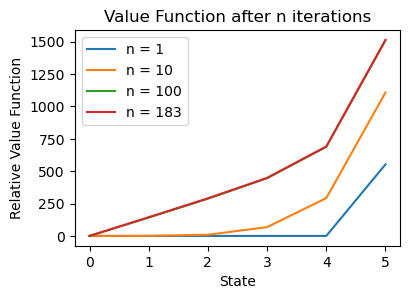

In [9]:
#value function plots
figure(figsize=((3/2)*7/2.5, 7/2.5))

plot(x2_1[2], label = "n = 1")
xlabel("State")
ylabel("Relative Value Function")
#title("Value Function after 1 iteration")
#savefig("example1n1.pdf", bbox_inches="tight")

#figure(figsize=(4, 4))
plot(x2_10[2], label = "n = 10")

#figure(figsize=(4, 4))
plot(x2_100[2], label = "n = 100")
xlabel("State")
ylabel("Relative Value Function")

#figure(figsize=(4, 4))
plot(x2_conv[2], label = "n = 183")
legend()
title("Value Function after n iterations")
savefig("example2.pdf", bbox_inches="tight")

In [95]:
#Example 3
function tau3(i)
    return log(1+i)
end
N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=6800.0 
epsilon=0.00001
#Results of RVIA for 1-step, 10-step, 100-step, and epsilon-converged problems
x3_1 = rviaMDD(N, alpha_d, alpha_r, beta, tau3, c0, c1, r, epsilon, 1)
println(x3_1)
x3_10 = rviaMDD(N, alpha_d, alpha_r, beta, tau3, c0, c1, r, epsilon, 10)
println(x3_10)
x3_100 = rviaMDD(N, alpha_d, alpha_r, beta, tau3, c0, c1, r, epsilon,100)
println(x3_100)
x3_conv = rviaMDD(N, alpha_d, alpha_r, beta, tau3, c0, c1, r, epsilon)
println(x3_conv)

(10.0, [0.0, 0.0, 0.0, 0.0, 0.0, 552.5295202857347], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1)
(10.122557177217274, [0.0, 1.167211211593071, 17.350221375317066, 174.55960912140927, 1210.254181434749, 5525.233605586115], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 10)
(690.3640409584542, [0.0, 6479.657532937658, 14381.76345480422, 23306.870006921938, 32813.27696946495, 42585.64120664603], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 100)
(999.9999832431481, [0.0, 9428.571268982361, 18947.802014021643, 28559.452496682963, 38265.334849409934, 48067.31504742147], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 479)


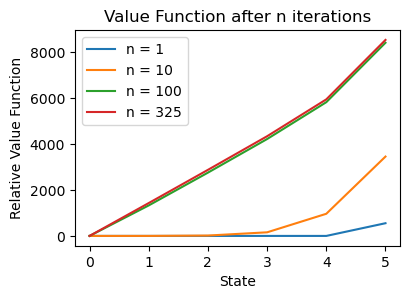

In [22]:
#value function plots
figure(figsize=((3/2)*7/2.5, 7/2.5))

plot(x3_1[2], label = "n = 1")
xlabel("State")
ylabel("Relative Value Function")
#title("Value Function after 1 iteration")
#savefig("example1n1.pdf", bbox_inches="tight")

#figure(figsize=(4, 4))
plot(x3_10[2], label = "n = 10")

#figure(figsize=(4, 4))
plot(x3_100[2], label = "n = 100")
xlabel("State")
ylabel("Relative Value Function")

#figure(figsize=(4, 4))
plot(x3_conv[2], label = "n = 325")
legend()
title("Value Function after n iterations")
savefig("example3.pdf", bbox_inches="tight")

########################################################

RVIA for the unrestricted model in Section 5, and the examples

########################################################

In [2]:
function rviaRS(N::Int64, alpha_d::Float64, alpha_r::Float64, beta::Float64, tau, c0::Float64, c1::Float64, r::Float64, epsilon::Float64; nMax = 0, delScale = 1)
    #calculate stepsize and initialise h,w,and policy vectors
    del = 1/(delScale*(beta*alpha_d + N*alpha_r + tau(N)))
    h = zeros(Float64, N+1, N+1)
    w = zeros(Float64, N+1, N+1)
    policy = zeros(Int64, N+1, N+1)
    n = 0
    #repeat until epsilion-convergence or n = nMax
    while true
        n = n + 1
        #calculate new w values and keep track of optimal policy
        
        #i1+i2<N case
        for i1 in 0:N-1
            #i2=0 case
            i2=0
            w[i1+1,0+1] = beta*c0*del + (beta*alpha_d + (N-i1)*alpha_r)*del*(h[i1+1+1,0+1] - h[i1+1,0+1]) + h[i1+1,0+1]
            policy[i1+1,0+1] = 0
            if i1!=0
                for a in 1:i1
                    temp = beta*c0*del + (i2+a)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1-a+1+1,i2+a+1] - h[i1-a+1,i2+a+1]) + h[i1-a+1,i2+a+1] + a*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                    if temp < w[i1+1,0+1]
                        w[i1+1,0+1] = temp
                        policy[i1+1,0+1] = a
                    end
                end
            end
            
            #i2>0 case
            for i2 in 1:N-i1-1
                w[i1+1,i2+1] = beta*c0*del + (i2)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1+1+1,i2+1] - h[i1+1,i2+1]) + h[i1+1,i2+1] + (i2)*alpha_r*del*(h[i1+1+1,i2-1+1] - h[i1+1,i2+1]) + tau(i2)*del*(h[i1+1,i2-1+1] - h[i1+1,i2+1])
                policy[i1+1,i2+1] = 0
                if i1!=0
                    for a in 1:i1
                        temp = beta*c0*del + (i2+a)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1-a+1+1,i2+a+1] - h[i1-a+1,i2+a+1]) + h[i1-a+1,i2+a+1] + (i2 + a)*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(i2 + a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                        if temp < w[i1+1,i2+1]
                            w[i1+1,i2+1] = temp
                            policy[i1+1,i2+1] = a
                        end
                    end
                end
            end
        end
        
        #i1=0, i2 = N case
        w[0+1,N+1] = beta*c1*del + N*r*del + N*alpha_r*del*(h[0+1+1,N-1+1] - h[0+1,N+1]) + tau(N)*del*(h[0+1,N-1+1] - h[0+1,N+1]) + h[0+1,N+1]
        policy[0+1,N+1] = 0
        
        #0<i1<N case
        for i1 in 1:N-1
            i2 = N - i1
            w[i1+1,i2+1] = beta*c1*del + i2*r*del + h[i1+1,i2+1] + i2*alpha_r*del*(h[i1+1+1,i2-1+1] - h[i1+1,i2+1]) + tau(i2)*del*(h[i1+1,i2-1+1] - h[i1+1,i2+1])
            policy[i1+1,i2+1] = 0
            for a in 1:i1
                temp = beta*c1*del + (i2 + a)*r*del + h[i1-a+1,i2+a+1] + (i2 + a)*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(i2 + a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                if temp < w[i1+1,i2+1]
                    w[i1+1,i2+1] = temp
                    policy[i1+1,i2+1] = a
                end
            end
        end
        
        #i1=N, i2=0 case
        w[N+1,0+1] = beta*c1*del + h[N+1,0+1]
        policy[N+1,0+1] = 0
        for a in 1:N
            temp = beta*c1*del + a*r*del + h[N-a+1,0+a+1] + (a)*alpha_r*del*(h[N-a+1+1,0+a-1+1] - h[N-a+1,0+a+1]) + tau(a)*del*(h[N-a+1,a-1+1] - h[N-a+1,a+1])
            if temp < w[N+1,0+1]
                w[N+1,0+1] = temp
                policy[N+1,0+1] = a
            end
        end
        
        #calculate new relative values
        hNew = Float64[w[i+1] - w[0+1] for i in 0:N]
        hNew = zeros(Float64, N+1, N+1)
        for i1 in 0:N
            for i2 in 0:N-i1
                hNew[i1+1,i2+1] = w[i1+1,i2+1] - w[1,1]
            end
        end
        
        deltas = zeros(Float64, N+1, N+1)
        for i1 in 0:N
            for i2 in 0:N-i1
                deltas[i1+1,i2+1] = hNew[i1+1,i2+1] - h[i1+1,i2+1]
            end
        end
        
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
    end
    
    v = beta*c0*del + (beta*alpha_d + (N)*alpha_r)*del*h[1+1,0+1] + (1 - (beta*alpha_d + (N)*alpha_r)*del)*h[0+1,0+1]
    
    return v/del, h, policy, n
end

rviaRS (generic function with 1 method)

In [4]:
#Example 1
function tau(a)
    return a
end

N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
x1 = rviaRS(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 1)
x10 = rviaRS(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 10)
x100 = rviaRS(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, 100)
xConv = rviaRS(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon)
println(xConv)

(10.360268238522362, [0.0 99.90611921216403 199.825740120135 299.9372459030808 404.81936033240345 700.7473075695735; 98.66922131926057 198.6332764136984 298.87326366320667 404.81936033240345 700.7473075695734 0.0; 198.28766339193902 298.87326366320667 405.15062996572624 700.7473075695734 0.0 0.0; 298.87326366320667 406.51065920025485 700.7473075695734 0.0 0.0 0.0; 404.81936033240345 700.7473075695734 0.0 0.0 0.0 0.0; 700.7473075695734 0.0 0.0 0.0 0.0 0.0], [0 0 0 0 0 0; 0 0 0 1 1 0; 0 1 1 2 0 0; 2 1 3 0 0 0; 4 4 0 0 0 0; 5 0 0 0 0 0], 720)


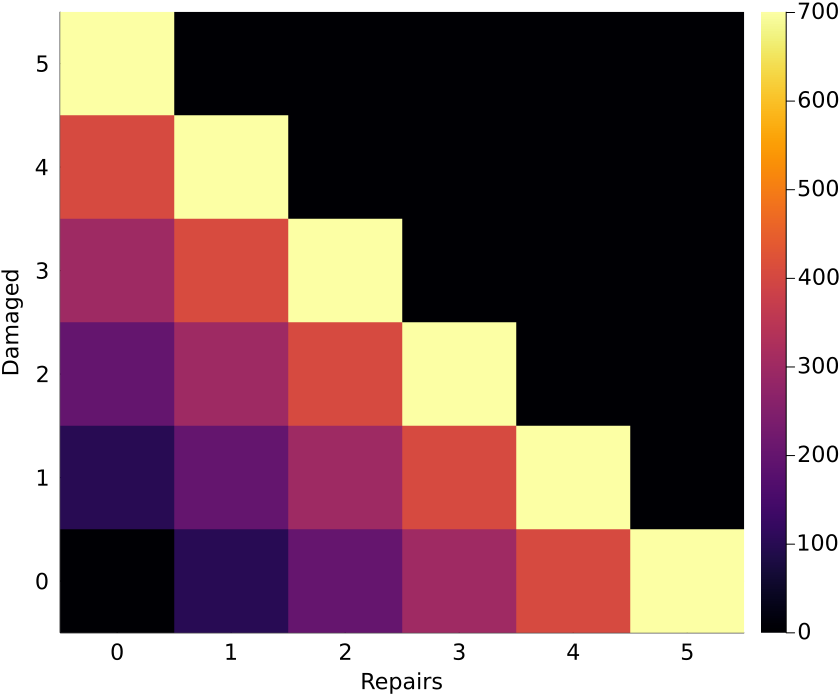

In [15]:
heatmap([i for i in 0:N], [i for i in 0:N], xConv[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt, colortickfontsize = pt)

In [59]:
#Example 2/3 (vary r manually to obtain different results)
function tau2(a)
    return log(1+a)
end

N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=3000.0 
epsilon=0.00001
xConv = rviaRS(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
println(xConv)

(456.5609204488442, [0.0 4322.08055316771 9774.178906608875 16254.86111753941 23715.063126684872 32378.719993868355; 4252.9611471318485 8576.580451591239 14033.386357837138 20542.690038627086 28328.749866614286 0.0; 8546.816314586322 12882.359405502375 18384.14142448811 25263.953115396776 0.0 0.0; 12882.359405502375 17311.088895982466 23265.650127976605 0.0 0.0 0.0; 17311.088895982466 22423.190857896454 0.0 0.0 0.0 0.0; 22423.190857896454 0.0 0.0 0.0 0.0 0.0], [0 0 0 0 0 0; 0 0 0 0 0 0; 0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0], 405)


In [60]:
println(xConv[3])

[0 0 0 0 0 0; 0 0 0 0 0 0; 0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0]


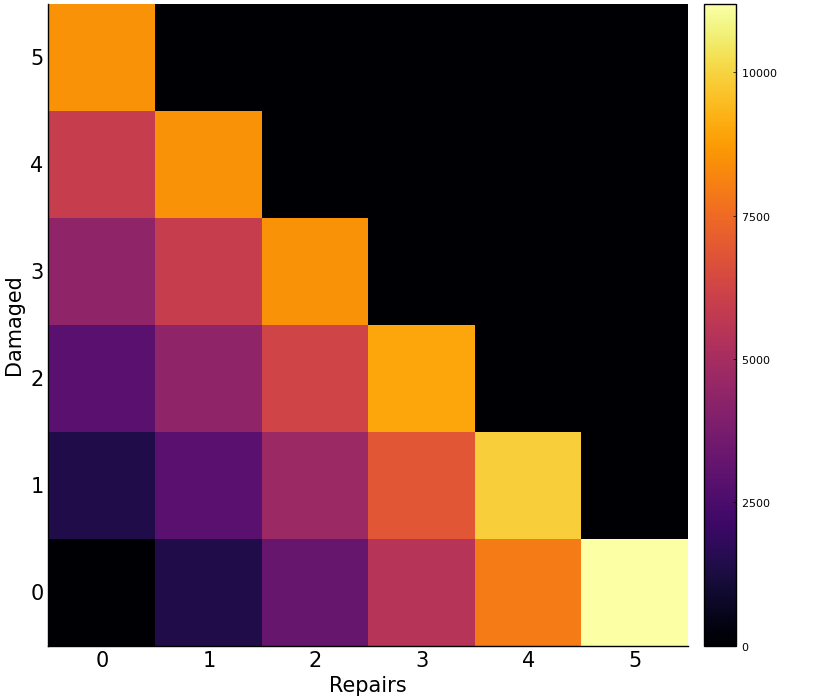

In [54]:
pt = 15
heatmap([i for i in 0:N], [i for i in 0:N], xConv[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

RVIA for restricted action model in Section 5.3

In [89]:
function rviaRSRestricted(N::Int64, alpha_d::Float64, alpha_r::Float64, beta::Float64, tau, c0::Float64, c1::Float64, r::Float64, epsilon::Float64; nMax = 0, delScale = 1)
    #calculate stepsize and initialise h,w,and policy vectors
    del = 1/(delScale*(beta*alpha_d + N*alpha_r + tau(N)))
    h = zeros(Float64, N+1, N+1)
    w = zeros(Float64, N+1, N+1)
    policy = zeros(Int64, N+1, N+1)
    n = 0
    #repeat until epsilion-convergence or n = nMax
    while true
        n = n + 1
        #calculate new w values and keep track of optimal policy
        
        #i1+i2<N case
        for i1 in 0:N-1
            #i2=0 case
            i2=0
            w[i1+1,0+1] = beta*c0*del + (beta*alpha_d + (N-i1)*alpha_r)*del*(h[i1+1+1,0+1] - h[i1+1,0+1]) + h[i1+1,0+1]
            policy[i1+1,0+1] = 0
            if i1!=0
                a=1
                temp = beta*c0*del + (i2+a)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1-a+1+1,i2+a+1] - h[i1-a+1,i2+a+1]) + h[i1-a+1,i2+a+1] + a*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                if temp < w[i1+1,0+1]
                    w[i1+1,0+1] = temp
                    policy[i1+1,0+1] = a
                end
            end
            
            #i2>0 case
            for i2 in 1:N-i1-1
                w[i1+1,i2+1] = beta*c0*del + (i2)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1+1+1,i2+1] - h[i1+1,i2+1]) + h[i1+1,i2+1] + (i2)*alpha_r*del*(h[i1+1+1,i2-1+1] - h[i1+1,i2+1]) + tau(i2)*del*(h[i1+1,i2-1+1] - h[i1+1,i2+1])
                policy[i1+1,i2+1] = 0
                if i1!=0
                    for a in 1:1
                        temp = beta*c0*del + (i2+a)*r*del + (beta*alpha_d + (N - i1 - i2)*alpha_r)*del*(h[i1-a+1+1,i2+a+1] - h[i1-a+1,i2+a+1]) + h[i1-a+1,i2+a+1] + (i2 + a)*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(i2 + a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                        if temp < w[i1+1,i2+1]
                            w[i1+1,i2+1] = temp
                            policy[i1+1,i2+1] = a
                        end
                    end
                end
            end
        end
        
        #i1=0, i2 = N case
        w[0+1,N+1] = beta*c1*del + N*r*del + N*alpha_r*del*(h[0+1+1,N-1+1] - h[0+1,N+1]) + tau(N)*del*(h[0+1,N-1+1] - h[0+1,N+1]) + h[0+1,N+1]
        policy[0+1,N+1] = 0
        
        #0<i1<N case
        for i1 in 1:N-1
            i2 = N - i1
            w[i1+1,i2+1] = beta*c1*del + i2*r*del + h[i1+1,i2+1] + i2*alpha_r*del*(h[i1+1+1,i2-1+1] - h[i1+1,i2+1]) + tau(i2)*del*(h[i1+1,i2-1+1] - h[i1+1,i2+1])
            policy[i1+1,i2+1] = 0
            for a in 1:1
                temp = beta*c1*del + (i2 + a)*r*del + h[i1-a+1,i2+a+1] + (i2 + a)*alpha_r*del*(h[i1-a+1+1,i2+a-1+1] - h[i1-a+1,i2+a+1]) + tau(i2 + a)*del*(h[i1-a+1,i2+a-1+1] - h[i1-a+1,i2+a+1])
                if temp < w[i1+1,i2+1]
                    w[i1+1,i2+1] = temp
                    policy[i1+1,i2+1] = a
                end
            end
        end
        
        #i1=N, i2=0 case
        w[N+1,0+1] = beta*c1*del + h[N+1,0+1]
        policy[N+1,0+1] = 0
        for a in 1:1
            temp = beta*c1*del + a*r*del + h[N-a+1,0+a+1] + (a)*alpha_r*del*(h[N-a+1+1,0+a-1+1] - h[N-a+1,0+a+1]) + tau(a)*del*(h[N-a+1,a-1+1] - h[N-a+1,a+1])
            if temp < w[N+1,0+1]
                w[N+1,0+1] = temp
                policy[N+1,0+1] = a
            end
        end
        
        #calculate new relative values
        hNew = Float64[w[i+1] - w[0+1] for i in 0:N]
        hNew = zeros(Float64, N+1, N+1)
        for i1 in 0:N
            for i2 in 0:N-i1
                hNew[i1+1,i2+1] = w[i1+1,i2+1] - w[1,1]
            end
        end
        
        deltas = zeros(Float64, N+1, N+1)
        for i1 in 0:N
            for i2 in 0:N-i1
                deltas[i1+1,i2+1] = hNew[i1+1,i2+1] - h[i1+1,i2+1]
            end
        end
        
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
    end
    
    v = beta*c0*del + (beta*alpha_d + (N)*alpha_r)*del*h[1+1,0+1] + (1 - (beta*alpha_d + (N)*alpha_r)*del)*h[0+1,0+1]
    
    return v/del, h, policy, n
end

rviaRSRestricted (generic function with 1 method)

In [88]:
#Example 1
N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
scale = 1
xConv = rviaRS(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = scale)
xConvRestricted = rviaRSRestricted(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = scale)
#normal results
println(xConv[1])
println(xConv[3])
println("\n")
#restricted results
println(xConvRestricted[1])
println(xConvRestricted[3])

20.35013498961906
[0 0 0 0 0 0; 0 0 0 1 1 0; 0 0 2 2 0 0; 1 3 3 0 0 0; 4 4 0 0 0 0; 5 0 0 0 0 0]


20.36387030696322
[0 0 0 0 0 0; 0 0 0 1 1 0; 0 1 1 1 0 0; 1 1 1 0 0 0; 1 1 0 0 0 0; 1 0 0 0 0 0]


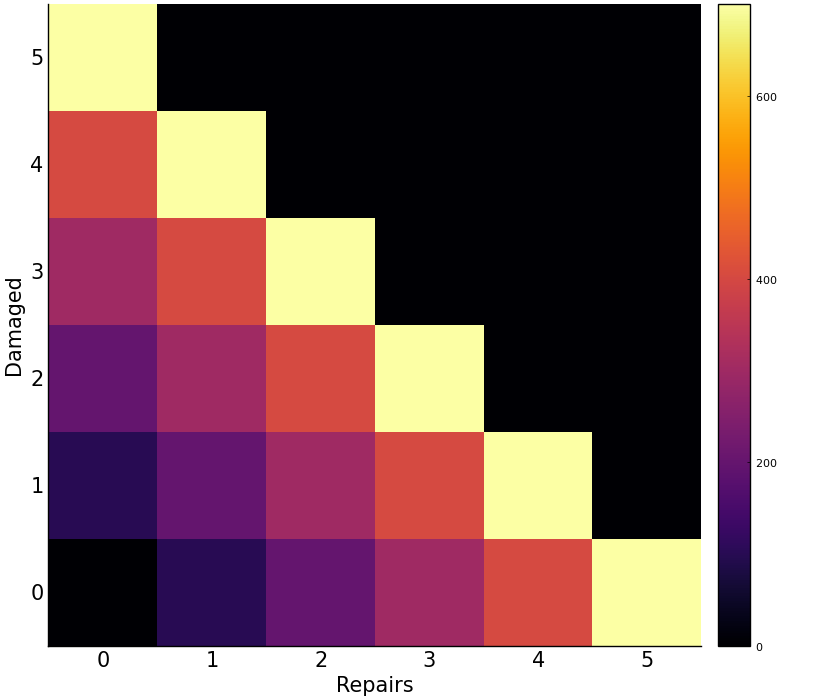

In [74]:
pt = 15
pyplot()
heatmap([i for i in 0:N], [i for i in 0:N], xConv[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

In [76]:
#Example 2
function tau2(a)
    return log(1+a)
end

N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
xConv = rviaRS(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
xConvRestricted = rviaRSRestricted(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
#normal results
println(xConv[1])
println(xConv[3])
println("\n")
#restricted results
println(xConvRestricted[1])
println(xConvRestricted[3])

25.15415747509903
[0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 1 0 0; 1 1 2 0 0 0; 2 3 0 0 0 0; 4 0 0 0 0 0]


25.154528785568083
[0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 1 0 0; 1 1 1 0 0 0; 1 1 0 0 0 0; 1 0 0 0 0 0]


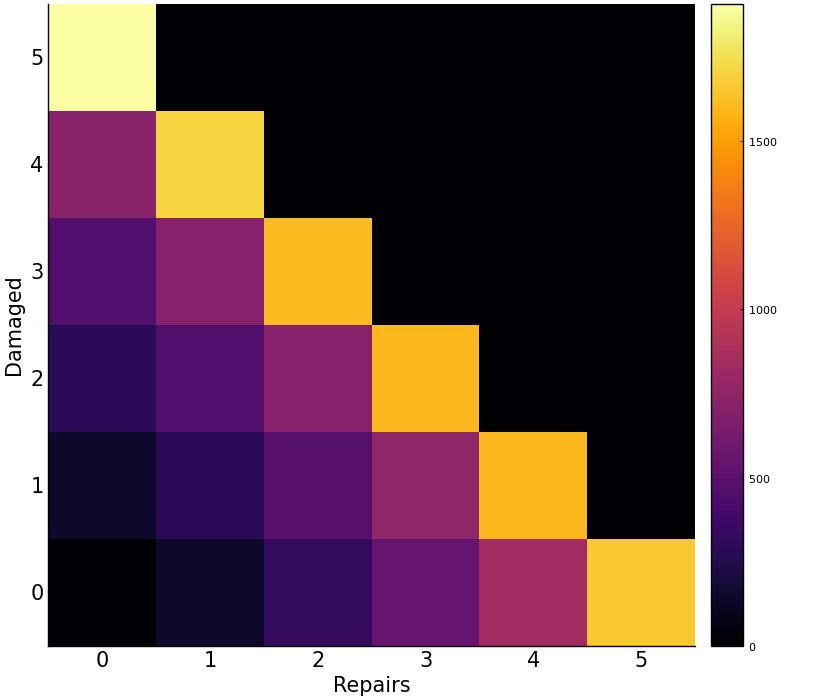

In [78]:
heatmap([i for i in 0:N], [i for i in 0:N], xConvRestricted[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

In [83]:
#Example 3, vary r for different results

N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=1000.0 
epsilon=0.00001
xConv = rviaRS(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
xConvRestricted = rviaRSRestricted(N, alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon)
#normal results
println(xConv[1])
println(xConv[3])
println("\n")
#restricted results
println(xConvRestricted[1])
println(xConvRestricted[3])

160.11131581814544
[0 0 0 0 0 0; 0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0; 1 1 0 0 0 0; 2 0 0 0 0 0]


160.11131581814544
[0 0 0 0 0 0; 0 0 0 0 0 0; 1 0 0 0 0 0; 1 0 0 0 0 0; 1 1 0 0 0 0; 1 0 0 0 0 0]


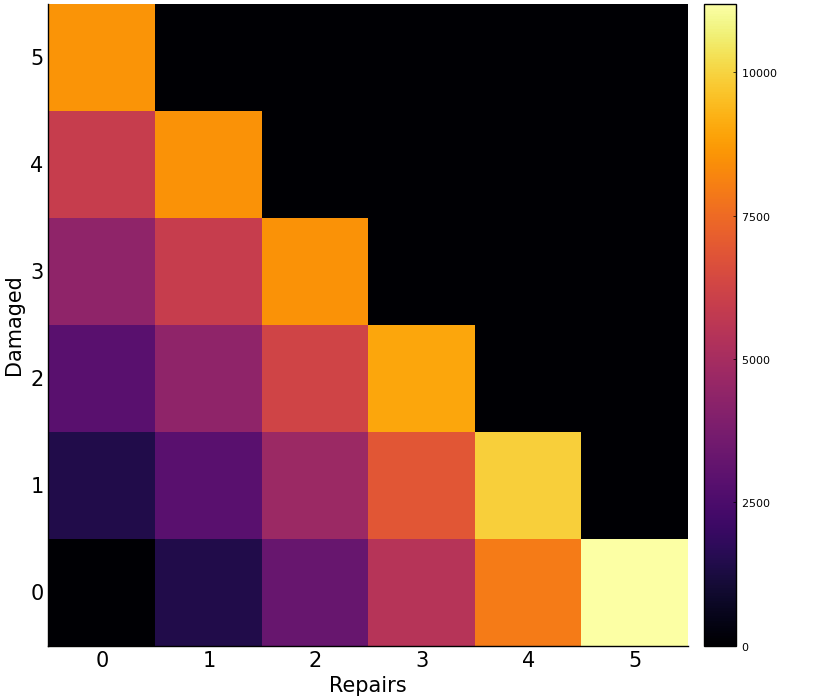

In [81]:
heatmap([i for i in 0:N], [i for i in 0:N], xConvRestricted[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

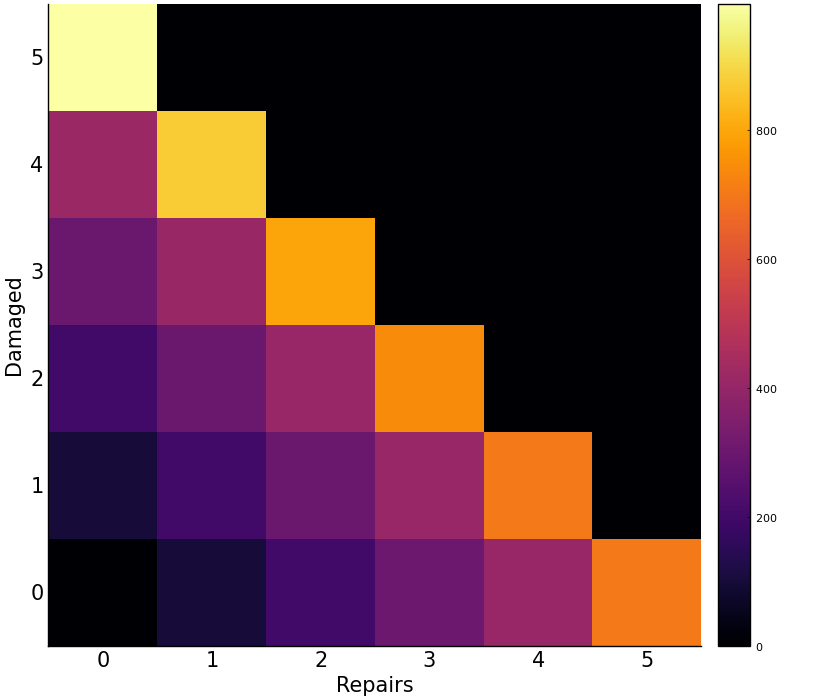

In [25]:
#Example 1 different heatmaps for difference deltas
N=5
alpha_d = 0.01
alpha_r = 0.001 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.000000001
scale = 1
xConvRes1 = rviaRSRestricted(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
xConvRes2 = rviaRSRestricted(N, alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 100)

pyplot()
pt=15
heatmap([i for i in 0:N], [i for i in 0:N], xConvRes1[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

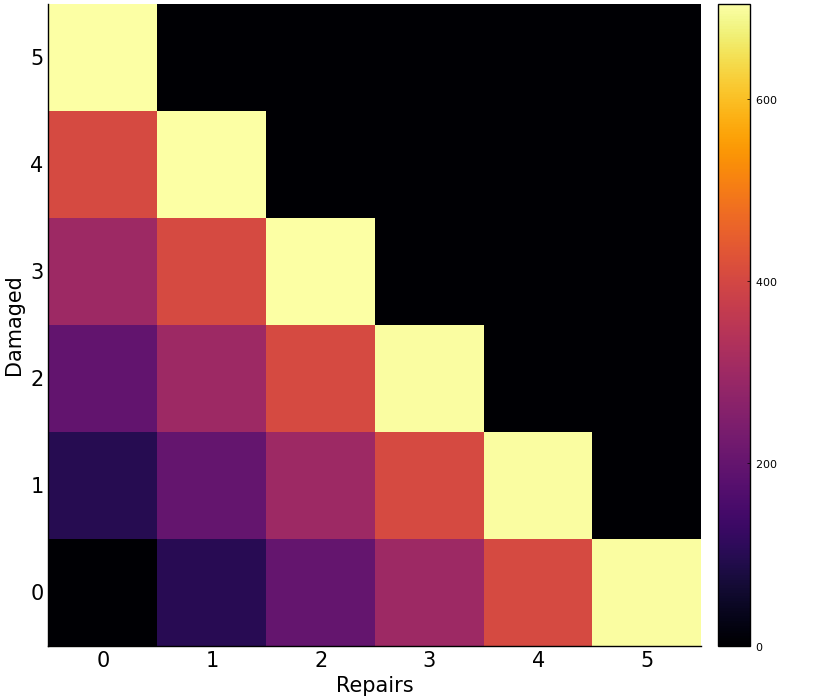

In [26]:
heatmap([i for i in 0:N], [i for i in 0:N], xConvRes2[2], xlabel = "Repairs", ylabel = "Damaged", xticks = [i for i in 0:N], yticks = [i for i in 0:N], size = (840,700), xlabelfontsize = pt, ylabelfontsize = pt, xtickfontsize = pt, ytickfontsize = pt)

########################################################

RVIA For 5 link inhomogeneous model with random routing (not used in the paper)

########################################################

In [4]:
#RVIA Expection for 5 links with random routing
function inhom5exp(s, alpha_d, alpha_r, beta, tau, r, del, h)
    #init running total
    total = 0
    
    #Relative value function if no change observed
    hs = h[s[1],s[2],s[3],s[4],s[5]]
    
    #number of healthy, repairing, and damaged links
    healthy = sum(i == 1 for i in s)
    repairing = sum(i == 2 for i in s)
    damaged = sum(i == 3 for i in s)
    
    #calculate repair rates
    repRate = 0
    if repairing > 0
        repRate = tau(repairing)/repairing
    end
    
    #calculate demand-degradation rates
    demandDeg = [0,0,0,0,0]
    if healthy > 0
        demandDeg = [beta*alpha_d[i]/healthy for i in 1:5]
    end
    
    #calculate total (ew) 
    total = total + (s[1]==1)*(demandDeg[1] + alpha_r[1])*del*(h[3,s[2],s[3],s[4],s[5]] - hs) + (s[1]==2)*(alpha_r[1]*del*(h[3,s[2],s[3],s[4],s[5]] - hs) + repRate*del*(h[1,s[2],s[3],s[4],s[5]] - hs))
    total = total + (s[2]==1)*(demandDeg[2] + alpha_r[2])*del*(h[s[1],3,s[3],s[4],s[5]] - hs) + (s[2]==2)*(alpha_r[2]*del*(h[s[1],3,s[3],s[4],s[5]] - hs) + repRate*del*(h[s[1],1,s[3],s[4],s[5]] - hs))
    total = total + (s[3]==1)*(demandDeg[3] + alpha_r[3])*del*(h[s[1],s[2],3,s[4],s[5]] - hs) + (s[3]==2)*(alpha_r[3]*del*(h[s[1],s[2],3,s[4],s[5]] - hs) + repRate*del*(h[s[1],s[2],1,s[4],s[5]] - hs))
    total = total + (s[4]==1)*(demandDeg[4] + alpha_r[4])*del*(h[s[1],s[2],s[3],3,s[5]] - hs) + (s[4]==2)*(alpha_r[4]*del*(h[s[1],s[2],s[3],3,s[5]] - hs) + repRate*del*(h[s[1],s[2],s[3],1,s[5]] - hs))
    total = total + (s[5]==1)*(demandDeg[5] + alpha_r[5])*del*(h[s[1],s[2],s[3],s[4],3] - hs) + (s[5]==2)*(alpha_r[5]*del*(h[s[1],s[2],s[3],s[4],3] - hs) + repRate*del*(h[s[1],s[2],s[3],s[4],1] - hs))
    total = total + hs
    return total
end

#RVIA for 5 links with random routing
function rviaInhom5(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon; nMax = 0, delScale = 1)
    #find timestep and initialise variables
    del = 1/(delScale*(beta*sum(alpha_d) + sum(alpha_r) + tau(N))) 
    h = zeros(Float64, 3, 3, 3, 3, 3)
    w = zeros(Float64, 3, 3, 3, 3, 3)
    policy = Array{Vector{Int64}}(UndefInitializer(), 3, 3, 3, 3, 3)
    n=0
    
    #until convergence
    while true
        n = n + 1
        #for every state
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            #find action value of null action
                            s = [s1,s2,s3,s4,s5]
                            healthy = sum(i == 1 for i in s)
                            repairing = sum(i == 2 for i in s)
                            oneStep = (healthy>0)*beta*c0*del + (healthy==0)*beta*c1*del + repairing*r*del
                            w[s1,s2,s3,s4,s5] = oneStep + inhom5exp(s, alpha_d, alpha_r, beta, tau, r, del, h)
                            policy[s1,s2,s3,s4,s5] = [0,0,0,0,0]
                            
                            #build feasible action space
                            A = [[0],[0],[0],[0],[0]]
                            for i in 1:5
                                if s[i] == 3
                                    append!(A[i],1)
                                end
                            end
                            
                            #find optimal action by iterating over all actions
                            for a1 in A[1]
                                for a2 in A[2]
                                    for a3 in A[3]
                                        for a4 in A[4]
                                            for a5 in A[5]
                                                a = [a1,a2,a3,a4,a5]
                                                sPrime = [s[i]*(a[i]==0) + 2*(a[i]==1) for i in 1:5]
                                                healthy = sum(i == 1 for i in sPrime)
                                                repairing = sum(i == 2 for i in sPrime)
                                                oneStep = (healthy>0)*beta*c0*del + (healthy==0)*beta*c1*del + repairing*r*del
                                                temp = oneStep + inhom5exp(sPrime, alpha_d, alpha_r, beta, tau, r, del, h)
                                                if temp < w[s1,s2,s3,s4,s5]
                                                    w[s1,s2,s3,s4,s5] = temp
                                                    policy[s1,s2,s3,s4,s5] = a
                                                end
                                            end
                                        end
                                    end
                                end
                            end
                        end     
                    end
                end
            end
        end
        
        #find new relative values
        hNew = zeros(Float64, 3, 3, 3, 3, 3)
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            hNew[s1,s2,s3,s4,s5] = w[s1,s2,s3,s4,s5] - w[1,1,1,1,1]
                        end
                    end
                end
            end
        end
        
        #check convergence
        deltas = zeros(Float64, 3, 3, 3, 3, 3)
        
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            deltas[s1,s2,s3,s4,s5] = abs(hNew[s1,s2,s3,s4,s5] - h[s1,s2,s3,s4,s5])
                        end
                    end
                end
            end
        end
        
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
        
    end 
    v = beta*c0*del + inhom5exp([1,1,1,1,1], alpha_d, alpha_r, beta, tau, r, del, h)
    return v/del, h, policy, n
end

rviaInhom5 (generic function with 1 method)

In [6]:
#Example 1, check inhomogeneous works for homogeneous as sanity check
function tau(a)
    return a
end

N=5
alpha_d = [0.01 for i in 1:5]
alpha_r = [0.001 for i in 1:5] 
beta=10.0
c0=1.0 
c1=100.0
r=100.0 
epsilon=0.00001
scale = 1
result = rviaInhom5(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])
rviaRS(5, alpha_d[1], alpha_r[1], beta, tau, c0, c1, r, epsilon, delScale = 1)

20.350132823465238
708


(20.35013498961906, [0.0 99.90525071634207 … 404.8237136744438 700.7536875684449; 98.57271418684819 198.52754136593356 … 700.7536875684449 0.0; … ; 404.8237136744438 700.7536875684449 … 0.0 0.0; 700.7536875684449 0.0 … 0.0 0.0], [0 0 … 0 0; 0 0 … 1 0; … ; 4 4 … 0 0; 5 0 … 0 0], 658)

########################################################

RVIA for 5 link inhomogeneous problem, for Section 6

########################################################

In [73]:
#rvia expectation for 5 links with optimal routing
function inhom5RoutedExp(s, alpha_d, alpha_r, beta, tau, c0, r, del, h)
    #initialise variables
    total = 0.0
    hs = h[s[1],s[2],s[3],s[4],s[5]]
    healthy = sum(i == 1 for i in s)
    repairing = sum(i == 2 for i in s)
    damaged = sum(i == 3 for i in s)
    
    #find first healthy link
    routeLink = 0
    bestCost = maximum(c0) + 1
    for i in 1:5
        if s[i] == 1
            routeLink = i
            bestCost = c0[i]
            break
        end
    end
    
    #find healthy link with lowest cost
    if routeLink!=0
        start = routeLink
        for i in start:5
            if c0[i] < bestCost && s[i]==1
                bestCost = c0[i]
                routeLink = i
            end
        end
    end
    
    #calculate repair rate
    repRate = 0
    if repairing > 0
        repRate = tau(repairing)/repairing
    end
    
    #calculate demand degradation for each link
    demandDeg = [0.0,0.0,0.0,0.0,0.0]
    if healthy > 0
        demandDeg[routeLink] = beta*alpha_d[routeLink]
    end
    
    #calculate total
    total = total + (s[1]==1)*(demandDeg[1] + alpha_r[1])*del*(h[3,s[2],s[3],s[4],s[5]] - hs) + (s[1]==2)*(alpha_r[1]*del*(h[3,s[2],s[3],s[4],s[5]] - hs) + repRate*del*(h[1,s[2],s[3],s[4],s[5]] - hs))
    total = total + (s[2]==1)*(demandDeg[2] + alpha_r[2])*del*(h[s[1],3,s[3],s[4],s[5]] - hs) + (s[2]==2)*(alpha_r[2]*del*(h[s[1],3,s[3],s[4],s[5]] - hs) + repRate*del*(h[s[1],1,s[3],s[4],s[5]] - hs))
    total = total + (s[3]==1)*(demandDeg[3] + alpha_r[3])*del*(h[s[1],s[2],3,s[4],s[5]] - hs) + (s[3]==2)*(alpha_r[3]*del*(h[s[1],s[2],3,s[4],s[5]] - hs) + repRate*del*(h[s[1],s[2],1,s[4],s[5]] - hs))
    total = total + (s[4]==1)*(demandDeg[4] + alpha_r[4])*del*(h[s[1],s[2],s[3],3,s[5]] - hs) + (s[4]==2)*(alpha_r[4]*del*(h[s[1],s[2],s[3],3,s[5]] - hs) + repRate*del*(h[s[1],s[2],s[3],1,s[5]] - hs))
    total = total + (s[5]==1)*(demandDeg[5] + alpha_r[5])*del*(h[s[1],s[2],s[3],s[4],3] - hs) + (s[5]==2)*(alpha_r[5]*del*(h[s[1],s[2],s[3],s[4],3] - hs) + repRate*del*(h[s[1],s[2],s[3],s[4],1] - hs))
    total = total + hs
    return total
end

#rvia for 5 links with optimal routing
function rviaInhom5Routed(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon; nMax = 0, delScale = 1)
    #initialise variables
    del = 1/(delScale*(beta*sum(alpha_d) + sum(alpha_r) + tau(N))) 
    h = zeros(Float64, 3, 3, 3, 3, 3)
    w = zeros(Float64, 3, 3, 3, 3, 3)
    policy = Array{Vector{Int64}}(UndefInitializer(), 3, 3, 3, 3, 3)
    n=0
    
    #until convergence
    while true
        #for every state
        n = n + 1
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            #initialise variable
                            s = [s1,s2,s3,s4,s5]
                            healthy = sum(i == 1 for i in s)
                            repairing = sum(i == 2 for i in s)
                            
                            #find overall repair cost for null action
                            repairCost = 0
                            if repairing>0
                                repairCost = sum(r[i] for i in 1:5 if s[i] == 2)
                            end
                            
                            #Find link used for routing demand
                            #find first healthy link
                            routeLink = 0
                            bestCost = maximum(c0) + 1
                            for i in 1:5
                                if s[i] == 1
                                    routeLink = i
                                    bestCost = c0[i]
                                    break
                                end
                            end

                            #find healthy link with lowest cost
                            if routeLink!=0
                                start = routeLink
                                for i in start:5
                                    if c0[i] < bestCost && s[i]==1
                                        bestCost = c0[i]
                                        routeLink = i
                                    end
                                end
                            end
                            
                            #find one-step cost for null-action, and set null-action to incumbant optimal action
                            oneStep = (healthy>0)*beta*bestCost*del + (healthy==0)*beta*c1*del + repairCost*del
                            w[s1,s2,s3,s4,s5] = oneStep + inhom5RoutedExp(s, alpha_d, alpha_r, beta, tau, c0, r, del, h)
                            policy[s1,s2,s3,s4,s5] = [0,0,0,0,0]
                            
                            #build action space
                            A = [[0],[0],[0],[0],[0]]
                            for i in 1:5
                                if s[i] == 3
                                    append!(A[i],[1])
                                end
                            end
                            
                            #for every action
                            for a1 in A[1]
                                for a2 in A[2]
                                    for a3 in A[3]
                                        for a4 in A[4]
                                            for a5 in A[5]
                                                #initialise variable
                                                a = [a1,a2,a3,a4,a5]
                                                sPrime = [s[i]*(a[i]==0) + 2*(a[i]==1) for i in 1:5]
                                                healthy = sum(i == 1 for i in sPrime)
                                                repairing = sum(i == 2 for i in sPrime)
                                                
                                                #calculate repair cost
                                                repairCost = 0
                                                if repairing>0
                                                    repairCost = sum(r[i] for i in 1:5 if sPrime[i] == 2)
                                                end
                                                
                                                #calculate one-step cost and Q-value
                                                oneStep = (healthy>0)*beta*bestCost*del + (healthy==0)*beta*c1*del + repairCost*del
                                                temp = oneStep + inhom5RoutedExp(sPrime, alpha_d, alpha_r, beta, tau, c0, r, del, h)
                                                
                                                #if this action is better, update solution
                                                if temp < w[s1,s2,s3,s4,s5]
                                                    w[s1,s2,s3,s4,s5] = temp
                                                    policy[s1,s2,s3,s4,s5] = a
                                                end
                                            end
                                        end
                                    end
                                end
                            end
                        end     
                    end
                end
            end
        end
        
        #find relative values
        hNew = zeros(Float64, 3, 3, 3, 3, 3)
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            hNew[s1,s2,s3,s4,s5] = w[s1,s2,s3,s4,s5] - w[1,1,1,1,1]
                        end
                    end
                end
            end
        end
        
        #check for convergence
        deltas = zeros(Float64, 3, 3, 3, 3, 3)
        
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            deltas[s1,s2,s3,s4,s5] = abs(hNew[s1,s2,s3,s4,s5] - h[s1,s2,s3,s4,s5])
                        end
                    end
                end
            end
        end
        
        #update relative values
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
        
    end 
    
    #calculate long-run average cost
    v = beta*minimum(c0)*del + inhom5RoutedExp([1,1,1,1,1], alpha_d, alpha_r, beta, tau, c0, r, del, h)
    return v/del, h, policy, n
end

rviaInhom5Routed (generic function with 1 method)

In [42]:
#Example 1
function tau(a)
    return a
end

N=5
alpha_d = [0.01 for i in 1:5]
alpha_r = [0.001 for i in 1:5] 
beta=10.0
c0=[1.0 for i in 1:5] 
c1=100.0
r=[100.0 for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])
rviaRS(5, alpha_d[1], alpha_r[1], beta, tau, c0[1], c1, r[1], epsilon, delScale = 1)

20.350134989619026
658


(20.35013498961906, [0.0 99.90525071634207 … 404.8237136744438 700.7536875684449; 98.57271418684819 198.52754136593356 … 700.7536875684449 0.0; … ; 404.8237136744438 700.7536875684449 … 0.0 0.0; 700.7536875684449 0.0 … 0.0 0.0], [0 0 … 0 0; 0 0 … 1 0; … ; 4 4 … 0 0; 5 0 … 0 0], 658)

In [7]:
#Example 2
N=5
alpha_d = [0.01*i for i in 1:5]
alpha_r = [0.001*i for i in 1:5] 
beta=10.0
c0=[1.0*i for i in 1:5] 
c1=100.0
r=[100.0*i for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

26.34193374955431
7453


In [74]:
#rvia for 5 links with optimal routing
function rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon; nMax = 0, delScale = 1)
    #initialise variables
    del = 1/(delScale*(beta*sum(alpha_d) + sum(alpha_r) + tau(N))) 
    h = zeros(Float64, 3, 3, 3, 3, 3)
    w = zeros(Float64, 3, 3, 3, 3, 3)
    policy = Array{Vector{Int64}}(UndefInitializer(), 3, 3, 3, 3, 3)
    n=0
    
    #until convergence
    while true
        #for every state
        n = n + 1
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            #initialise variable
                            s = [s1,s2,s3,s4,s5]
                            healthy = sum(i == 1 for i in s)
                            repairing = sum(i == 2 for i in s)
                            
                            #find overall repair cost for null action
                            repairCost = 0
                            if repairing>0
                                repairCost = sum(r[i] for i in 1:5 if s[i] == 2)
                            end
                            
                            #Find link used for routing demand
                            #find first healthy link
                            routeLink = 0
                            bestCost = maximum(c0) + 1
                            for i in 1:5
                                if s[i] == 1
                                    routeLink = i
                                    bestCost = c0[i]
                                    break
                                end
                            end

                            #find healthy link with lowest cost
                            if routeLink!=0
                                start = routeLink
                                for i in start:5
                                    if c0[i] < bestCost && s[i]==1
                                        bestCost = c0[i]
                                        routeLink = i
                                    end
                                end
                            end
                            
                            #find one-step cost for null-action, and set null-action to incumbant optimal action
                            oneStep = (healthy>0)*beta*bestCost*del + (healthy==0)*beta*c1*del + repairCost*del
                            w[s1,s2,s3,s4,s5] = oneStep + inhom5RoutedExp(s, alpha_d, alpha_r, beta, tau, c0, r, del, h)
                            policy[s1,s2,s3,s4,s5] = [0,0,0,0,0]
                            
                            #build action space
                            A = [[0,0,0,0,0]]
                            for i in 1:5
                                if s[i] == 3
                                    a = [0,0,0,0,0]
                                    a[i] = 1
                                    append!(A,[a])
                                end
                            end
                            
                            #for every action
                            for a in A
                                #initialise variable
                                sPrime = [s[i]*(a[i]==0) + 2*(a[i]==1) for i in 1:5]
                                healthy = sum(i == 1 for i in sPrime)
                                repairing = sum(i == 2 for i in sPrime)
                                                
                                #calculate repair cost
                                repairCost = 0
                                if repairing>0
                                    repairCost = sum(r[i] for i in 1:5 if sPrime[i] == 2)
                                end
                                                
                                #calculate one-step cost and Q-value
                                oneStep = (healthy>0)*beta*bestCost*del + (healthy==0)*beta*c1*del + repairCost*del
                                temp = oneStep + inhom5RoutedExp(sPrime, alpha_d, alpha_r, beta, tau, c0, r, del, h)
                                                
                                #if this action is better, update solution
                                if temp < w[s1,s2,s3,s4,s5]
                                    w[s1,s2,s3,s4,s5] = temp
                                    policy[s1,s2,s3,s4,s5] = a
                                end
                            end  
                        end     
                    end
                end
            end
        end
        
        #find relative values
        hNew = zeros(Float64, 3, 3, 3, 3, 3)
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            hNew[s1,s2,s3,s4,s5] = w[s1,s2,s3,s4,s5] - w[1,1,1,1,1]
                        end
                    end
                end
            end
        end
        
        #check for convergence
        deltas = zeros(Float64, 3, 3, 3, 3, 3)
        
        for s1 in 1:3
            for s2 in 1:3
                for s3 in 1:3
                    for s4 in 1:3
                        for s5 in 1:3
                            deltas[s1,s2,s3,s4,s5] = abs(hNew[s1,s2,s3,s4,s5] - h[s1,s2,s3,s4,s5])
                        end
                    end
                end
            end
        end
        
        #update relative values
        h = hNew
        if maximum(deltas) < epsilon || n == nMax
            break
        end
        
    end 
    
    #calculate long-run average cost
    v = beta*minimum(c0)*del + inhom5RoutedExp([1,1,1,1,1], alpha_d, alpha_r, beta, tau, c0, r, del, h)
    return v/del, h, policy, n
end

rviaInhom5RoutedRestricted (generic function with 1 method)

In [81]:
#Example 1, sanity check
alpha_d = [0.01 for i in 1:5]
alpha_r = [0.001 for i in 1:5] 
beta=10.0
c0=[1.0 for i in 1:5] 
c1=100.0
r=[100.0 for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

resultRes = rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(resultRes[1])
println(resultRes[4])

20.350132823465234
708
20.363870306963204
758


In [76]:
#Homog Example 2 and 3, sanity check
function tau2(a)
    return log(1+a)
end

alpha_d = [0.01 for i in 1:5]
alpha_r = [0.001 for i in 1:5] 
beta=10.0
c0=[1.0 for i in 1:5] 
c1=100.0
r=[100.0 for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

resultRes = rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(resultRes[1])
println(resultRes[4])

25.154157445633842
215
25.154460366008948
216


In [77]:
alpha_d = [0.01 for i in 1:5]
alpha_r = [0.001 for i in 1:5] 
beta=10.0
c0=[1.0 for i in 1:5] 
c1=100.0
r=[1000.0 for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

resultRes = rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(resultRes[1])
println(resultRes[4])

160.1113122012717
413
160.1113122012717
413


In [138]:
#Example 2
N=5
alpha_d = [0.01*i for i in 1:5]
alpha_r = [0.001*i for i in 1:5] 
beta=10.0
c0=[1.0*i for i in 1:5] 
c1=100.0
r=[100.0*i for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

resultRes = rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau, c0, c1, r, epsilon, delScale = 1)
println(resultRes[1])
println(resultRes[4])

26.34194371903661
8586
26.341943753245683
9470


In [99]:
for s1 in 1:3
    for s2 in 1:3
        for s3 in 1:3
            for s4 in 1:3
                for s5 in 1:3
                    print(s1,s2,s3,s4,s5)
                    println(result[3][s1,s2,s3,s4,s5])
                end
            end
        end
    end
end

11111[0, 0, 0, 0, 0]
11112[0, 0, 0, 0, 0]
11113[0, 0, 0, 0, 0]
11121[0, 0, 0, 0, 0]
11122[0, 0, 0, 0, 0]
11123[0, 0, 0, 0, 0]
11131[0, 0, 0, 0, 0]
11132[0, 0, 0, 0, 0]
11133[0, 0, 0, 0, 0]
11211[0, 0, 0, 0, 0]
11212[0, 0, 0, 0, 0]
11213[0, 0, 0, 0, 0]
11221[0, 0, 0, 0, 0]
11222[0, 0, 0, 0, 0]
11223[0, 0, 0, 0, 0]
11231[0, 0, 0, 0, 0]
11232[0, 0, 0, 0, 0]
11233[0, 0, 0, 0, 0]
11311[0, 0, 0, 0, 0]
11312[0, 0, 0, 0, 0]
11313[0, 0, 0, 0, 0]
11321[0, 0, 0, 0, 0]
11322[0, 0, 0, 0, 0]
11323[0, 0, 0, 0, 0]
11331[0, 0, 0, 0, 0]
11332[0, 0, 0, 0, 0]
11333[0, 0, 1, 0, 0]
12111[0, 0, 0, 0, 0]
12112[0, 0, 0, 0, 0]
12113[0, 0, 0, 0, 0]
12121[0, 0, 0, 0, 0]
12122[0, 0, 0, 0, 0]
12123[0, 0, 0, 0, 0]
12131[0, 0, 0, 0, 0]
12132[0, 0, 0, 0, 0]
12133[0, 0, 0, 0, 0]
12211[0, 0, 0, 0, 0]
12212[0, 0, 0, 0, 0]
12213[0, 0, 0, 0, 0]
12221[0, 0, 0, 0, 0]
12222[0, 0, 0, 0, 0]
12223[0, 0, 0, 0, 0]
12231[0, 0, 0, 0, 0]
12232[0, 0, 0, 0, 0]
12233[0, 0, 0, 0, 0]
12311[0, 0, 0, 0, 0]
12312[0, 0, 0, 0, 0]
12313[0, 0, 0

In [142]:
result[3][1,1,1,3,3]

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [105]:
for s1 in 1:3
    for s2 in 1:3
        for s3 in 1:3
            for s4 in 1:3
                for s5 in 1:3
                    print(s1,s2,s3,s4,s5)
                    println(resultRes[3][s1,s2,s3,s4,s5])
                end
            end
        end
    end
end

11111[0, 0, 0, 0, 0]
11112[0, 0, 0, 0, 0]
11113[0, 0, 0, 0, 0]
11121[0, 0, 0, 0, 0]
11122[0, 0, 0, 0, 0]
11123[0, 0, 0, 0, 0]
11131[0, 0, 0, 0, 0]
11132[0, 0, 0, 0, 0]
11133[0, 0, 0, 0, 0]
11211[0, 0, 0, 0, 0]
11212[0, 0, 0, 0, 0]
11213[0, 0, 0, 0, 0]
11221[0, 0, 0, 0, 0]
11222[0, 0, 0, 0, 0]
11223[0, 0, 0, 0, 0]
11231[0, 0, 0, 0, 0]
11232[0, 0, 0, 0, 0]
11233[0, 0, 0, 0, 0]
11311[0, 0, 0, 0, 0]
11312[0, 0, 0, 0, 0]
11313[0, 0, 0, 0, 0]
11321[0, 0, 0, 0, 0]
11322[0, 0, 0, 0, 0]
11323[0, 0, 0, 0, 0]
11331[0, 0, 0, 0, 0]
11332[0, 0, 0, 0, 0]
11333[0, 0, 1, 0, 0]
12111[0, 0, 0, 0, 0]
12112[0, 0, 0, 0, 0]
12113[0, 0, 0, 0, 0]
12121[0, 0, 0, 0, 0]
12122[0, 0, 0, 0, 0]
12123[0, 0, 0, 0, 0]
12131[0, 0, 0, 0, 0]
12132[0, 0, 0, 0, 0]
12133[0, 0, 0, 0, 0]
12211[0, 0, 0, 0, 0]
12212[0, 0, 0, 0, 0]
12213[0, 0, 0, 0, 0]
12221[0, 0, 0, 0, 0]
12222[0, 0, 0, 0, 0]
12223[0, 0, 0, 0, 0]
12231[0, 0, 0, 0, 0]
12232[0, 0, 0, 0, 0]
12233[0, 0, 0, 0, 0]
12311[0, 0, 0, 0, 0]
12312[0, 0, 0, 0, 0]
12313[0, 0, 0

In [143]:
#Example 3
alpha_d = [0.01*i for i in 1:5]
alpha_r = [0.001*i for i in 1:5] 
beta=10.0
c0=[1.0*i for i in 1:5] 
c1=100.0
r=[100.0*i for i in 1:5] 
epsilon=0.00001
scale = 1.0
result = rviaInhom5Routed(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(result[1])
println(result[4])

resultRes = rviaInhom5RoutedRestricted(alpha_d, alpha_r, beta, tau2, c0, c1, r, epsilon, delScale = 1)
println(resultRes[1])
println(resultRes[4])

40.90042530495536
5422
40.900444440686584
5422


In [117]:
for s1 in 1:3
    for s2 in 1:3
        for s3 in 1:3
            for s4 in 1:3
                for s5 in 1:3
                    print(s1,s2,s3,s4,s5)
                    println(result[3][s1,s2,s3,s4,s5])
                end
            end
        end
    end
end

11111[0, 0, 0, 0, 0]
11112[0, 0, 0, 0, 0]
11113[0, 0, 0, 0, 0]
11121[0, 0, 0, 0, 0]
11122[0, 0, 0, 0, 0]
11123[0, 0, 0, 0, 0]
11131[0, 0, 0, 0, 0]
11132[0, 0, 0, 0, 0]
11133[0, 0, 0, 1, 0]
11211[0, 0, 0, 0, 0]
11212[0, 0, 0, 0, 0]
11213[0, 0, 0, 0, 0]
11221[0, 0, 0, 0, 0]
11222[0, 0, 0, 0, 0]
11223[0, 0, 0, 0, 0]
11231[0, 0, 0, 0, 0]
11232[0, 0, 0, 0, 0]
11233[0, 0, 0, 0, 0]
11311[0, 0, 1, 0, 0]
11312[0, 0, 0, 0, 0]
11313[0, 0, 1, 0, 0]
11321[0, 0, 0, 0, 0]
11322[0, 0, 0, 0, 0]
11323[0, 0, 0, 0, 0]
11331[0, 0, 1, 0, 0]
11332[0, 0, 0, 0, 0]
11333[0, 0, 1, 0, 0]
12111[0, 0, 0, 0, 0]
12112[0, 0, 0, 0, 0]
12113[0, 0, 0, 0, 0]
12121[0, 0, 0, 0, 0]
12122[0, 0, 0, 0, 0]
12123[0, 0, 0, 0, 0]
12131[0, 0, 0, 0, 0]
12132[0, 0, 0, 0, 0]
12133[0, 0, 0, 0, 0]
12211[0, 0, 0, 0, 0]
12212[0, 0, 0, 0, 0]
12213[0, 0, 0, 0, 0]
12221[0, 0, 0, 0, 0]
12222[0, 0, 0, 0, 0]
12223[0, 0, 0, 0, 0]
12231[0, 0, 0, 0, 0]
12232[0, 0, 0, 0, 0]
12233[0, 0, 0, 0, 0]
12311[0, 0, 0, 0, 0]
12312[0, 0, 0, 0, 0]
12313[0, 0, 0

In [118]:
for s1 in 1:3
    for s2 in 1:3
        for s3 in 1:3
            for s4 in 1:3
                for s5 in 1:3
                    print(s1,s2,s3,s4,s5)
                    println(resultRes[3][s1,s2,s3,s4,s5])
                end
            end
        end
    end
end

11111[0, 0, 0, 0, 0]
11112[0, 0, 0, 0, 0]
11113[0, 0, 0, 0, 0]
11121[0, 0, 0, 0, 0]
11122[0, 0, 0, 0, 0]
11123[0, 0, 0, 0, 0]
11131[0, 0, 0, 0, 0]
11132[0, 0, 0, 0, 0]
11133[0, 0, 0, 1, 0]
11211[0, 0, 0, 0, 0]
11212[0, 0, 0, 0, 0]
11213[0, 0, 0, 0, 0]
11221[0, 0, 0, 0, 0]
11222[0, 0, 0, 0, 0]
11223[0, 0, 0, 0, 0]
11231[0, 0, 0, 0, 0]
11232[0, 0, 0, 0, 0]
11233[0, 0, 0, 0, 0]
11311[0, 0, 1, 0, 0]
11312[0, 0, 0, 0, 0]
11313[0, 0, 1, 0, 0]
11321[0, 0, 0, 0, 0]
11322[0, 0, 0, 0, 0]
11323[0, 0, 0, 0, 0]
11331[0, 0, 1, 0, 0]
11332[0, 0, 0, 0, 0]
11333[0, 0, 1, 0, 0]
12111[0, 0, 0, 0, 0]
12112[0, 0, 0, 0, 0]
12113[0, 0, 0, 0, 0]
12121[0, 0, 0, 0, 0]
12122[0, 0, 0, 0, 0]
12123[0, 0, 0, 0, 0]
12131[0, 0, 0, 0, 0]
12132[0, 0, 0, 0, 0]
12133[0, 0, 0, 0, 0]
12211[0, 0, 0, 0, 0]
12212[0, 0, 0, 0, 0]
12213[0, 0, 0, 0, 0]
12221[0, 0, 0, 0, 0]
12222[0, 0, 0, 0, 0]
12223[0, 0, 0, 0, 0]
12231[0, 0, 0, 0, 0]
12232[0, 0, 0, 0, 0]
12233[0, 0, 0, 0, 0]
12311[0, 0, 0, 0, 0]
12312[0, 0, 0, 0, 0]
12313[0, 0, 0

In [158]:
println(result[3][1,1,1,1,3])

[0, 0, 0, 0, 0]
